In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../../Dataset/01-03-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
94151,0,0,0,0,0,0,1,1,0,0,...,5,20,0,0,0,0,0,0,0,0
36517,0,0,0,0,0,0,1,1,0,0,...,5,20,0,0,0,0,0,0,0,0
94152,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
78853,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
94153,0,0,0,0,0,0,0,0,0,0,...,8,8,355986.2857,38365.00373,425798,316056,14700000,41073.02896,14700000,14600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92534,0,0,0,0,0,0,0,0,0,0,...,5,8,4000689,0,4000689,4000689,21400000,15300000,42000000,7200659
92533,0,0,0,0,0,0,0,0,0,0,...,5,8,4000684,0,4000684,4000684,21400000,15300000,42000000,7200667
328181,0,0,0,0,0,0,1,1,0,0,...,7,20,0,0,0,0,0,0,0,0
328182,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,86600000,0,86600000,86600000


In [4]:
df16Aux = pd.read_csv("../../Dataset/28-02-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [5]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [6]:
df16Aux = None

In [7]:
df16

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
352143,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
364088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56320368,18.3847763109,56320381,56320355
207898,0,0,0,0,0,0,1,1,0,0,...,5,20,0,0,0,0,0,0,0,0
221098,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
232490,0,0,0,0,0,0,1,1,0,0,...,6,20,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207897,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,0,0,0,0
500032,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
488997,0,0,0,0,0,0,1,1,0,0,...,6,20,0,0,0,0,0,0,0,0
496254,0,0,0,0,0,0,0,1,0,0,...,5,20,0,0,0,0,0,0,0,0


In [8]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [9]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [10]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [11]:
dfAE = None
df15 = None
df16 = None
out = None

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [13]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [14]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [15]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [16]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [17]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [18]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
21040/21040 [==============================] - 25s 1ms/step - loss: 0.0053 - accuracy: 0.6589 - val_loss: 0.0034 - val_accuracy: 0.6603
Epoch 2/10
21040/21040 [==============================] - 24s 1ms/step - loss: 0.0034 - accuracy: 0.6874 - val_loss: 0.0034 - val_accuracy: 0.6580
Epoch 3/10
21040/21040 [==============================] - 23s 1ms/step - loss: 0.0034 - accuracy: 0.6880 - val_loss: 0.0034 - val_accuracy: 0.6817s - loss: 0.0034 - accuracy: 0.68 - ETA: 4s - loss: 0.0034 - accuracy - ETA: 4s - loss: 0.0034  - ETA: 4s - ETA: 3s - loss: 0.0034 - accu - - ETA: 0s - loss: 0.0034 - ac - ETA: 0s - loss: 0.0034 - accuracy: 
Epoch 4/10
21040/21040 [==============================] - 23s 1ms/step - loss: 0.0034 - accuracy: 0.6880 - val_loss: 0.0033 - val_accuracy: 0.6524
Epoch 5/10
21040/21040 [==============================] - 24s 1ms/step - loss: 0.0034 - accuracy: 0.6890 - val_loss: 0.0033 - val_accuracy: 0.7014
Epoch 6/10
21040/21040 [==============================] - 

In [19]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.0032606070639619854


In [20]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [21]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [22]:
tamanhoSequencia = 10

In [23]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [25]:
inp = None
out = None

## Classificador

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
9230/9230 [==============================] - 57s 6ms/step - loss: 0.5737 - accuracy: 0.7284 - val_loss: 0.2733 - val_accuracy: 0.9949
Epoch 2/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5452 - accuracy: 0.7419 - val_loss: 0.2114 - val_accuracy: 0.9973
Epoch 3/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5378 - accuracy: 0.7442 - val_loss: 0.2097 - val_accuracy: 0.9970
Epoch 4/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5351 - accuracy: 0.7457 - val_loss: 0.1776 - val_accuracy: 0.9995
Epoch 5/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5335 - accuracy: 0.7467 - val_loss: 0.2089 - val_accuracy: 0.9975
Epoch 6/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5287 - accuracy: 0.7497 - val_loss: 0.2341 - val_accuracy: 0.9977
Epoch 7/10
9230/9230 [==============================] - 52s 6ms/step - loss: 0.5260 - accuracy: 0.7518 - val_loss: 0.2398 - val_ac

In [28]:
input_label15 = None
output_label15 = None

In [29]:
resu = model.predict(np.array(input_label16))

In [30]:
res = [np.argmax(r) for r in resu]

In [31]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [32]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[493922  44735]
 [ 61764   6472]]


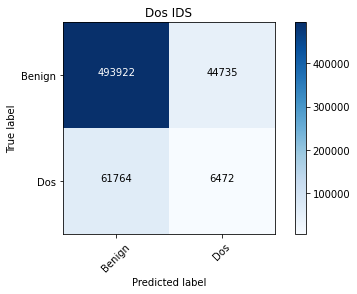

In [33]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [34]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

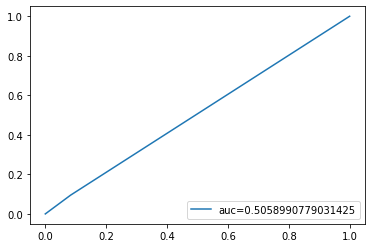

In [35]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()